In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

c:\Users\kmixi\anaconda3\envs\py39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Read data
data = pd.read_csv("analysis.csv")

In [3]:
#info() helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day                      20000 non-null  object 
 1   device                   20000 non-null  object 
 2   domain                   20000 non-null  object 
 3   utm_campaign             591 non-null    object 
 4   utm_content              76 non-null     object 
 5   utm_medium               981 non-null    object 
 6   utm_source               962 non-null    object 
 7   utm_term                 155 non-null    object 
 8   country                  19999 non-null  object 
 9   oeid                     19297 non-null  object 
 10  auction_start            20000 non-null  object 
 11  auction_end              20000 non-null  object 
 12  auction_ttl              20000 non-null  float64
 13  auction_id               20000 non-null  object 
 14  ad_unit_code          

In [4]:
#Check for Duplication
data.nunique()

day                            1
device                         3
domain                       231
utm_campaign                 102
utm_content                   33
utm_medium                    57
utm_source                    66
utm_term                      27
country                      116
oeid                       13646
auction_start              14743
auction_end                14685
auction_ttl                 4569
auction_id                 16633
ad_unit_code                1285
bidder                        17
bidder_cpm                  1397
bidder_start               15953
bidder_end                 13652
bidder_ttl                  3166
bidder_is_after_timeout        2
bidder_media_type              4
bidder_width                  11
bidder_height                 13
bidder_source                  1
bidder_status                  3
bidder_deal_id                10
consent                        2
advertisers                  126
subdomain                     20
is_impress

In [5]:
#Missing Values Calculation
data.isnull().sum()

day                            0
device                         0
domain                         0
utm_campaign               19409
utm_content                19924
utm_medium                 19019
utm_source                 19038
utm_term                   19845
country                        1
oeid                         703
auction_start                  0
auction_end                    0
auction_ttl                    0
auction_id                     0
ad_unit_code                   0
bidder                         0
bidder_cpm                     0
bidder_start                   0
bidder_end                     0
bidder_ttl                     0
bidder_is_after_timeout        0
bidder_media_type              0
bidder_width                   0
bidder_height                  0
bidder_source                  0
bidder_status                  0
bidder_deal_id                 0
consent                        0
advertisers                    0
subdomain                  19144
is_impress

In [6]:
#calculate the percentage of missing values in each column
(data.isnull().sum()/(len(data)))*100

day                         0.000
device                      0.000
domain                      0.000
utm_campaign               97.045
utm_content                99.620
utm_medium                 95.095
utm_source                 95.190
utm_term                   99.225
country                     0.005
oeid                        3.515
auction_start               0.000
auction_end                 0.000
auction_ttl                 0.000
auction_id                  0.000
ad_unit_code                0.000
bidder                      0.000
bidder_cpm                  0.000
bidder_start                0.000
bidder_end                  0.000
bidder_ttl                  0.000
bidder_is_after_timeout     0.000
bidder_media_type           0.000
bidder_width                0.000
bidder_height               0.000
bidder_source               0.000
bidder_status               0.000
bidder_deal_id              0.000
consent                     0.000
advertisers                 0.000
subdomain     

In [7]:
#Data reduction -> The have got many NA values
data = data.drop(['utm_campaign', 'utm_content', 'utm_medium', 'utm_source', 'utm_term','subdomain'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day                      20000 non-null  object 
 1   device                   20000 non-null  object 
 2   domain                   20000 non-null  object 
 3   country                  19999 non-null  object 
 4   oeid                     19297 non-null  object 
 5   auction_start            20000 non-null  object 
 6   auction_end              20000 non-null  object 
 7   auction_ttl              20000 non-null  float64
 8   auction_id               20000 non-null  object 
 9   ad_unit_code             20000 non-null  object 
 10  bidder                   20000 non-null  object 
 11  bidder_cpm               20000 non-null  float64
 12  bidder_start             20000 non-null  object 
 13  bidder_end               20000 non-null  object 
 14  bidder_ttl            

In [8]:
#Check if all values are equal
equal_values=[]
# Iterate over each column
for column in data.columns:
    are_all_equal = data[column].nunique() == 1
    
    if are_all_equal:
        print(f"All values in the '{column}' column are equal.")
        equal_values.append(column)
   

All values in the 'day' column are equal.
All values in the 'bidder_source' column are equal.


In [9]:
#Data reduction -> Values are the same
data = data.drop(equal_values, axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   device                   20000 non-null  object 
 1   domain                   20000 non-null  object 
 2   country                  19999 non-null  object 
 3   oeid                     19297 non-null  object 
 4   auction_start            20000 non-null  object 
 5   auction_end              20000 non-null  object 
 6   auction_ttl              20000 non-null  float64
 7   auction_id               20000 non-null  object 
 8   ad_unit_code             20000 non-null  object 
 9   bidder                   20000 non-null  object 
 10  bidder_cpm               20000 non-null  float64
 11  bidder_start             20000 non-null  object 
 12  bidder_end               20000 non-null  object 
 13  bidder_ttl               20000 non-null  float64
 14  bidder_is_after_timeou

In [10]:
#Data reduction -> Values are the same
all_started_at_the_same_day=[]
def check_execution_time(df, column, substring):
    # Check if every item in the column contains the specified substring
    if df[column].str.contains(substring).all():
        # If every item contains the substring, remove it from the string
        all_started_at_the_same_day.append(column)

# Assuming 'auction_start' and 'auction_end' are the columns containing the event start dates in string format
substring = "2023-12-14"

# Remove the substring if all items in the 'auction_start' column contain it
check_execution_time(data, 'auction_start', substring)

# Remove the substring if all items in the 'auction_end' column contain it
check_execution_time(data, 'auction_end', substring)

print(all_started_at_the_same_day)


['auction_start', 'auction_end']


In [11]:
#will display the top 5 observations of the dataset
data.head()

,device,domain,country,oeid,auction_start,auction_end,auction_ttl,auction_id,ad_unit_code,bidder,...,bidder_media_type,bidder_width,bidder_height,bidder_status,bidder_deal_id,consent,advertisers,is_impression,refreshed,os
0,mobile,iefimerida.gr,GR,d3e2a605-7215-4e0e-9db8-e0b070d92074,2023-12-14 22:36:07.191,2023-12-14 22:36:08.046,855.0,8512fe7d-a22a-4014-8bb3-129846a4a70a,ad_unit_code0,bidder0,...,banner-video,0,0,noBid,bidder_deal_id0,False,advertisers0,False,False,Android
1,mobile,aek365.org,GR,428cd39c-2a48-49ae-b065-d26b41deebe5,2023-12-14 22:36:43.933,2023-12-14 22:36:45.585,1652.0,eb5ac663-3844-4c9c-9e79-3efde2f90f46,ad_unit_code1,bidder1,...,banner,0,0,noBid,bidder_deal_id0,False,advertisers0,False,False,Android
2,mobile,zinapost.gr,GR,6c004d96-4027-4a55-9bfc-e304c6f8f63e,2023-12-14 22:36:37.884,2023-12-14 22:36:03.606,25722.0,3d09c283-d76f-48ea-8be4-e49b93018562,ad_unit_code2,bidder2,...,banner,0,0,noBid,bidder_deal_id0,True,advertisers0,False,False,Android
3,mobile,govastileto.gr,GR,42a81cc6-4de2-4585-a024-5b9947ec9e52,2023-12-14 22:36:31.119,2023-12-14 22:36:33.020,1901.0,a3b92827-d4f4-438e-9278-d50a32d62793,ad_unit_code3,bidder3,...,banner-video,0,0,noBid,bidder_deal_id0,True,advertisers0,False,False,Android
4,desktop,greek-movies.com,GR,e48698c2-005d-4286-ad61-7b06c8ba0a45,2023-12-14 22:36:35.709,2023-12-14 22:36:36.148,439.0,163a4bc0-f681-49ca-8842-c9b33af3bad2,ad_unit_code4,bidder1,...,banner,0,0,timeout,bidder_deal_id0,False,advertisers0,False,False,Windows


In [26]:
country_counts = data['country'].value_counts()

# Calculate sum of counts for other countries excluding 'GR'
other_countries_sum = country_counts.drop('GR').sum()

gr_sum = (data['country'] == 'GR').sum()

print("Country is Greece")
print(gr_sum)
print("Country is other ")
print(other_countries_sum)

total_countries = len(data['country'])
percentage_gr = (gr_sum / (total_countries)) * 100

print("Percentage of 'GR' out of all other countries:", percentage_gr)

Country is Greece
15048
Country is other 
4951
Percentage of 'GR' out of all other countries: 75.24


In [13]:
# Filter out 'GR' from the country counts
other_countries_counts = country_counts.drop('GR')

# Select top five countries
top_i_countries = other_countries_counts.head(30)

print(top_i_countries)
# Plotting
#plt.figure(figsize=(10, 6))
#top_i_countries.plot(kind='bar')
#plt.title('Top Five Countries (Excluding GR)')
#plt.xlabel('Country')
#plt.ylabel('Count')
#plt.xticks(rotation=45)
#plt.grid(axis='y')
#plt.tight_layout()
#plt.show()


country
SI    1605
BG     633
CY     324
DE     288
US     263
EG     251
GB     192
RO     164
CA      94
NL      76
BE      59
IT      55
SE      52
FR      48
ES      46
CH      44
RS      44
AU      41
TR      41
AT      31
PL      31
GE      29
HR      25
DK      25
AL      24
UA      23
NO      22
AE      21
IE      21
ZA      20
Name: count, dtype: int64


In [14]:

# Assuming 'county' and 'domain' are the column names
# Find the 10 most popular counties
top_countries = data['country'].value_counts().head(10).index.tolist()

# Iterate over each top county
for country in top_countries:
    # Filter data for the current county
    country_data = data[data['country'] == country]
    
    # Find the total number of entries for the current country
    total_entries = len(country_data)
    
    # Find the 5 most visited domains for the current country
    top_domains = country_data['domain'].value_counts().head(5)
    
    # Calculate and print the percentage of each domain
    print(f"Top 5 domains for {country}:")
    for domain, count in top_domains.items():
        percentage = (count / total_entries) * 100
        print(f"{domain}: {percentage:.2f}%")
    print()




Top 5 domains for GR:
sdna.gr: 10.21%
argiro.gr: 7.58%
iefimerida.gr: 5.40%
enikos.gr: 3.49%
zappit.gr: 3.42%

Top 5 domains for SI:
bolha.com: 29.66%
metropolitan.si: 27.41%
svet24.si: 24.36%
vecer.com: 11.96%
nogomania.com: 3.24%

Top 5 domains for BG:
zajenata.bg: 60.19%
pik.bg: 31.75%
168chasa.bg: 5.85%
sdna.gr: 0.63%
zappit.gr: 0.32%

Top 5 domains for CY:
argiro.gr: 9.88%
greek-movies.com: 7.10%
youfly.com: 4.63%
enikos.gr: 4.01%
bovary.gr: 3.70%

Top 5 domains for DE:
argiro.gr: 12.15%
sdna.gr: 11.46%
greek-movies.com: 5.90%
gazzetta.gr: 4.86%
marinetraffic.com: 4.86%

Top 5 domains for US:
alison.com: 26.24%
marinetraffic.com: 25.10%
whoscored.com: 11.79%
argiro.gr: 8.37%
iefimerida.gr: 3.80%

Top 5 domains for EG:
masrawy.com: 58.96%
yallakora.com: 33.86%
elconsolto.com: 3.98%
marinetraffic.com: 1.99%
alison.com: 1.20%

Top 5 domains for GB:
whoscored.com: 17.71%
marinetraffic.com: 14.58%
sdna.gr: 14.06%
alison.com: 8.85%
greek-movies.com: 4.69%

Top 5 domains for RO:
b365.ro:

In [15]:
top_counties = data['country'].value_counts().head(10).index.tolist()

# Initialize a dictionary to store the top 5 domains for each county
country_top_domains = {county: set() for county in top_counties}

# Iterate over each top county
for country in top_countries:
    # Filter data for the current county
    country_data = data[data['country'] == country]
    
    # Find the top 5 domains for the current county
    top_domains = country_data['domain'].value_counts().head(5).index.tolist()
    
    # Add the top domains to the set
    country_top_domains[country].update(top_domains)

# Initialize a dictionary to store the countries for each domain
domain_countries = {}

# Iterate over each county's top domains
for country, domains in country_top_domains.items():
    for domain in domains:
        if domain in domain_countries:
            domain_countries[domain].append(country)
        else:
            domain_countries[domain] = [country]

# Find common domains among countries
common_domains = {domain: countries for domain, countries in domain_countries.items() if len(countries) > 1}

# Display the common domains and the countries where they occur
if common_domains:
    print("Common domains among multiple countries:")
    for domain, countries in common_domains.items():
        print(f"{domain}: {', '.join(countries)}")
else:
    print("No common domains found among multiple countries.")

Common domains among multiple countries:
zappit.gr: GR, BG
enikos.gr: GR, CY
argiro.gr: GR, CY, DE, US
sdna.gr: GR, BG, DE, GB, RO, CA
iefimerida.gr: GR, US
greek-movies.com: CY, DE, GB, CA
marinetraffic.com: DE, US, EG, GB, RO, CA
alison.com: US, EG, GB, RO, CA
whoscored.com: US, GB, RO, CA


In [16]:
top_countries = data['country'].value_counts().head(5).index.tolist()

# Create an empty dictionary to store device frequencies for each country
country_device_counts = {country: {} for country in top_countries}

# Iterate over each top country
for country in top_countries:
    # Filter data for the current country
    country_data = data[data['country'] == country]
    
    # Count the frequency of each device type for the current country
    device_counts = country_data['device'].value_counts().to_dict()
    
    # Calculate total entries for the current country
    total_entries = len(country_data)
    
    # Calculate and store the device frequencies and percentages for the current country
    for device, count in device_counts.items():
        percentage = (count / total_entries) * 100
        country_device_counts[country][device] = {'count': count, 'percentage': percentage}

# Display the device frequencies and percentages for each country
for country, device_info in country_device_counts.items():
    print(f"Devices used in {country}:")
    for device, info in device_info.items():
        print(f"{device}: Count: {info['count']}, Percentage: {info['percentage']:.2f}%")
    print()

Devices used in GR:
mobile: Count: 12791, Percentage: 85.00%
desktop: Count: 2149, Percentage: 14.28%
tablet: Count: 108, Percentage: 0.72%

Devices used in SI:
mobile: Count: 1283, Percentage: 79.94%
desktop: Count: 321, Percentage: 20.00%
tablet: Count: 1, Percentage: 0.06%

Devices used in BG:
mobile: Count: 543, Percentage: 85.78%
desktop: Count: 89, Percentage: 14.06%
tablet: Count: 1, Percentage: 0.16%

Devices used in CY:
mobile: Count: 285, Percentage: 87.96%
desktop: Count: 32, Percentage: 9.88%
tablet: Count: 7, Percentage: 2.16%

Devices used in DE:
mobile: Count: 220, Percentage: 76.39%
desktop: Count: 55, Percentage: 19.10%
tablet: Count: 13, Percentage: 4.51%



In [45]:
##os
all_bidder_data =  len(data['os'])
bidders = data['os'].value_counts()

for bidder,counts in bidders.items():
    percentage = (counts/all_bidder_data)*100
    print(f"OS: {bidder}, Percentage {percentage:.2f}%")

OS: Android, Percentage 71.05%
OS: Windows, Percentage 13.68%
OS: iOS, Percentage 11.46%
OS: OSX, Percentage 2.45%
OS: iPadOS, Percentage 0.71%
OS: Linux, Percentage 0.48%
OS: ChromeOS, Percentage 0.17%


In [42]:
##Bidder
all_bidder_data =  len(data['bidder'])
bidders = data['bidder'].value_counts().head(5)

for bidder,counts in bidders.items():
    percentage = (counts/all_bidder_data)*100
    print(f"Bidder: {bidder}, Percentage {percentage:.2f}%")

Bidder: bidder1, Percentage 13.05%
Bidder: bidder0, Percentage 10.66%
Bidder: bidder5, Percentage 9.20%
Bidder: bidder8, Percentage 8.48%
Bidder: bidder4, Percentage 8.43%


In [44]:
#bidder_media_type 
all_bidder_data =  len(data['bidder_media_type'])
bidders = data['bidder_media_type'].value_counts()

for bidder,counts in bidders.items():
    percentage = (counts/all_bidder_data)*100
    print(f"bidder_media_type: {bidder}, Percentage {percentage:.2f}%")

bidder_media_type: banner, Percentage 59.27%
bidder_media_type: banner-video, Percentage 27.30%
bidder_media_type: video, Percentage 13.43%
bidder_media_type: -, Percentage 0.01%


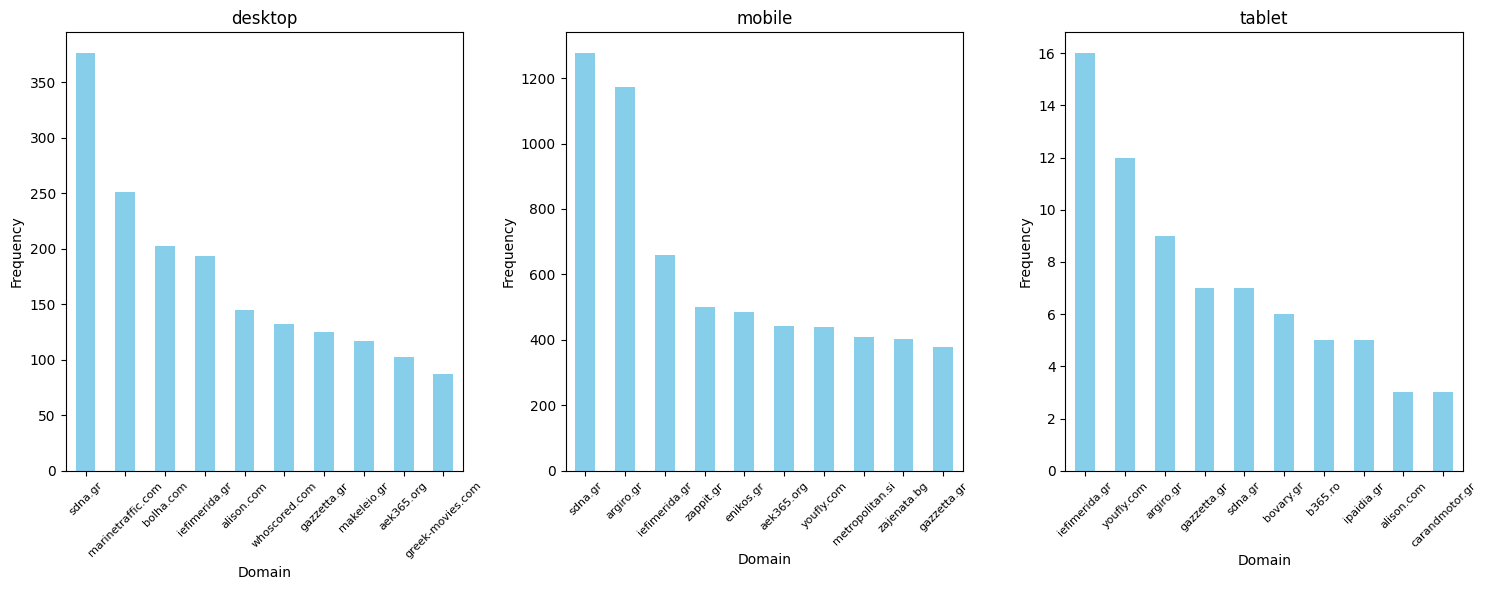

Common domains across all devices:
sdna.gr, gazzetta.gr, iefimerida.gr


In [17]:
####Show data per device

top_domains_per_device = data.groupby(['device', 'domain']).size().reset_index(name='count')

# Get the top 10 domains per device
top_domains_per_device = top_domains_per_device.sort_values(by=['device', 'count'], ascending=[True, False])
top_10_domains_per_device = top_domains_per_device.groupby('device').head(10).copy()

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=len(top_10_domains_per_device['device'].unique()), figsize=(15, 6))

common_domains_info = []

for i, (device, data_local) in enumerate(top_10_domains_per_device.groupby('device')):
    ax = axes[i]
    data_local.plot(kind='bar', x='domain', y='count', ax=ax, color='skyblue')
    ax.set_title(device)
    ax.set_xlabel('Domain')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.legend().remove()

    common_domains_info.append(set(data_local['domain']))

plt.tight_layout()
plt.show()

# Find domains common to all devices
common_domains = set.intersection(*common_domains_info)

print("Common domains across all devices:")
if common_domains:
    print(", ".join(common_domains))
else:
    print("No common domains found across all devices.")

In [18]:
# Step 1: Calculate the total duration for each domain
domain_duration = data.groupby('domain')['auction_ttl'].sum()

# Step 2: Get the top 10 domains with the maximum duration
top_10_domains = domain_duration.nlargest(10)

# Step 3: Filter the data for these top 10 domains
top_10_data = data[data['domain'].isin(top_10_domains.index)]

# Step 4: Group the filtered data by domain and country and sum the duration
duration_per_domain_country = top_10_data.groupby(['domain', 'country'])['auction_ttl'].sum().reset_index()

# Step 5: Sort the duration within each domain group
duration_per_domain_country_sorted = duration_per_domain_country.sort_values(by=['domain', 'auction_ttl'], ascending=[True, False])

# Step 6: Calculate total duration for each domain
domain_total_duration = duration_per_domain_country_sorted.groupby('domain')['auction_ttl'].sum()

# Step 7: Print the results with percentages
for domain, domain_group in duration_per_domain_country_sorted.groupby('domain'):
    print("Domain:", domain)
    print("Countries sorted by duration (Top 3) with percentages:")
    for index, row in domain_group[['country', 'auction_ttl']].head(3).iterrows():
        percentage = (row['auction_ttl'] / domain_total_duration[domain]) * 100
        print(f"{row['country']}: {row['auction_ttl']} ({percentage:.2f}%)")
    print("############################")

Domain: aek365.org
Countries sorted by duration (Top 3) with percentages:
GR: 3063593.0 (97.21%)
DE: 14551.0 (0.46%)
GB: 14444.0 (0.46%)
############################
Domain: argiro.gr
Countries sorted by duration (Top 3) with percentages:
GR: 46292325.0 (99.22%)
DE: 114306.0 (0.24%)
US: 93493.0 (0.20%)
############################
Domain: iefimerida.gr
Countries sorted by duration (Top 3) with percentages:
GR: 1428508.0 (95.98%)
FI: 16047.0 (1.08%)
US: 9339.0 (0.63%)
############################
Domain: ieidiseis.gr
Countries sorted by duration (Top 3) with percentages:
GR: 1456583.0 (99.62%)
CY: 3791.0 (0.26%)
IE: 900.0 (0.06%)
############################
Domain: marinetraffic.com
Countries sorted by duration (Top 3) with percentages:
US: 109792.0 (9.76%)
GB: 77344.0 (6.88%)
GR: 73871.0 (6.57%)
############################
Domain: metropolitan.si
Countries sorted by duration (Top 3) with percentages:
SI: 5969120.0 (99.89%)
HR: 2006.0 (0.03%)
PL: 1351.0 (0.02%)
#######################

In [19]:
data.head()

,device,domain,country,oeid,auction_start,auction_end,auction_ttl,auction_id,ad_unit_code,bidder,...,bidder_media_type,bidder_width,bidder_height,bidder_status,bidder_deal_id,consent,advertisers,is_impression,refreshed,os
0,mobile,iefimerida.gr,GR,d3e2a605-7215-4e0e-9db8-e0b070d92074,2023-12-14 22:36:07.191,2023-12-14 22:36:08.046,855.0,8512fe7d-a22a-4014-8bb3-129846a4a70a,ad_unit_code0,bidder0,...,banner-video,0,0,noBid,bidder_deal_id0,False,advertisers0,False,False,Android
1,mobile,aek365.org,GR,428cd39c-2a48-49ae-b065-d26b41deebe5,2023-12-14 22:36:43.933,2023-12-14 22:36:45.585,1652.0,eb5ac663-3844-4c9c-9e79-3efde2f90f46,ad_unit_code1,bidder1,...,banner,0,0,noBid,bidder_deal_id0,False,advertisers0,False,False,Android
2,mobile,zinapost.gr,GR,6c004d96-4027-4a55-9bfc-e304c6f8f63e,2023-12-14 22:36:37.884,2023-12-14 22:36:03.606,25722.0,3d09c283-d76f-48ea-8be4-e49b93018562,ad_unit_code2,bidder2,...,banner,0,0,noBid,bidder_deal_id0,True,advertisers0,False,False,Android
3,mobile,govastileto.gr,GR,42a81cc6-4de2-4585-a024-5b9947ec9e52,2023-12-14 22:36:31.119,2023-12-14 22:36:33.020,1901.0,a3b92827-d4f4-438e-9278-d50a32d62793,ad_unit_code3,bidder3,...,banner-video,0,0,noBid,bidder_deal_id0,True,advertisers0,False,False,Android
4,desktop,greek-movies.com,GR,e48698c2-005d-4286-ad61-7b06c8ba0a45,2023-12-14 22:36:35.709,2023-12-14 22:36:36.148,439.0,163a4bc0-f681-49ca-8842-c9b33af3bad2,ad_unit_code4,bidder1,...,banner,0,0,timeout,bidder_deal_id0,False,advertisers0,False,False,Windows


In [20]:
# Get the top 3 dominant advertisers
top_3_advertisers = data['advertisers'].value_counts().head(3)

print("Top 3 Dominant Advertisers:")
print(top_3_advertisers)

# Calculate the total number of entries
total_entries = len(data)

print("Top 3 Dominant Advertisers with percentages:")
for advertiser, count in top_3_advertisers.items():
    percentage = (count / total_entries) * 100
    print(f"{advertiser}: {count} ({percentage:.2f}%)")

Top 3 Dominant Advertisers:
advertisers
advertisers0     19777
advertisers31       12
advertisers26       12
Name: count, dtype: int64
Top 3 Dominant Advertisers with percentages:
advertisers0: 19777 (98.89%)
advertisers31: 12 (0.06%)
advertisers26: 12 (0.06%)


In [21]:
# MAX duration per advertiser
#Which are the 5 most popular domains that every advertiser has

advertiser_duration = data.groupby('advertisers')['auction_ttl'].sum()

# Find the advertiser with the maximum duration
max_duration_advertiser = advertiser_duration.idxmax()

print("Advertiser with maximum duration:", max_duration_advertiser)

# Filter the DataFrame for the advertiser with max duration
max_duration_df = data[data['advertisers'] == max_duration_advertiser]

# Group by 'domains' and sum the durations
domain_duration = max_duration_df.groupby('domain')['auction_ttl'].sum()

# Find the 5 domains with the maximum duration
top_10_domains = domain_duration.nlargest(10)

# Now, let's perform the same operations for all advertisers
for advertiser in data['advertisers'].unique():
    print("\n##################################")
    print("Advertiser:", advertiser)
    advertiser_df = data[data['advertisers'] == advertiser]
    
    # Group by 'domains' and sum the durations
    domain_duration = advertiser_df.groupby('domain')['auction_ttl'].sum()
    
    # Find the 10 domains with the maximum duration
    top_10_domains = domain_duration.nlargest(10)
    
    # Calculate total duration for the advertiser
    total_duration = advertiser_duration[advertiser]
    
    print("Total duration for advertiser:", total_duration)
    print("Top 10 domains with maximum duration (with percentages):")
    
    total_entries = len(advertiser_df)  # Total entries for this advertiser
    
    for domain, duration in top_10_domains.items():
        percentage = (duration / total_duration) * 100
        print(f"{domain}: {duration} ({percentage:.2f}%)")
    
    print("##################################")

Advertiser with maximum duration: advertisers0

##################################
Advertiser: advertisers0
Total duration for advertiser: 95597881.0
Top 10 domains with maximum duration (with percentages):
argiro.gr: 46630138.0 (48.78%)
metropolitan.si: 5968934.0 (6.24%)
aek365.org: 3145536.0 (3.29%)
sdna.gr: 3030218.0 (3.17%)
reader.gr: 2774655.0 (2.90%)
iefimerida.gr: 1479665.0 (1.55%)
ieidiseis.gr: 1458839.0 (1.53%)
zarpanews.gr: 1334650.0 (1.40%)
pentapostagma.gr: 1232567.0 (1.29%)
marinetraffic.com: 1115563.0 (1.17%)
##################################

##################################
Advertiser: advertisers1
Total duration for advertiser: 21943.0
Top 10 domains with maximum duration (with percentages):
argiro.gr: 15953.0 (72.70%)
carandmotor.gr: 2672.0 (12.18%)
gastronomos.gr: 2298.0 (10.47%)
sansimera.gr: 1020.0 (4.65%)
##################################

##################################
Advertiser: advertisers2
Total duration for advertiser: 1434.0
Top 10 domains with maxi

In [22]:
#bidder_media_type comparing with duration and domains

bidder_duration = data.groupby('bidder_media_type')['auction_ttl'].sum()

# Sort by duration in descending order
bidder_duration_sorted = bidder_duration.sort_values(ascending=False)

print("Total duration for each bidder_media_type (sorted):\n", bidder_duration_sorted)
print("###################\n")

# Now, let's calculate percentages and display for each bidder_media_type
total_duration_all = bidder_duration.sum()  # Total duration for all bidder_media_types

print("Total duration for all bidder_media_types:", total_duration_all)

for bidder_type, duration in bidder_duration_sorted.items():
    percentage = (duration / total_duration_all) * 100
    print(f"{bidder_type}: {duration} ({percentage:.2f}%)")

print("###################\n")

bidder_domain_duration = data.groupby(['bidder_media_type', 'domain'])['auction_ttl'].sum()

# Find the 5 sites with the maximum duration per bidder_media_type
top_5_sites_per_bidder_media_type = bidder_domain_duration.groupby('bidder_media_type').nlargest(5)

print("Ten sites with max duration per bidder_media_type (with percentages):")

for bidder_type, site_data in top_5_sites_per_bidder_media_type.groupby(level=0):
    print(f"\nBidder Media Type: {bidder_type}")
    total_duration = bidder_duration[bidder_type]  # Total duration for this bidder_media_type
    
    for domain, duration in site_data.items():
        percentage = (duration / total_duration) * 100
        print(f"Domain: {domain[1]}, Duration: {duration}, Percentage: {percentage:.2f}%")

Total duration for each bidder_media_type (sorted):
 bidder_media_type
banner          50183617.0
banner-video    33662901.0
video           12120373.0
-                    757.0
Name: auction_ttl, dtype: float64
###################

Total duration for all bidder_media_types: 95967648.0
banner: 50183617.0 (52.29%)
banner-video: 33662901.0 (35.08%)
video: 12120373.0 (12.63%)
-: 757.0 (0.00%)
###################

Ten sites with max duration per bidder_media_type (with percentages):

Bidder Media Type: -
Domain: -, Duration: 757.0, Percentage: 100.00%

Bidder Media Type: banner
Domain: banner, Duration: 23649725.0, Percentage: 47.13%
Domain: banner, Duration: 2705007.0, Percentage: 5.39%
Domain: banner, Duration: 2303544.0, Percentage: 4.59%
Domain: banner, Duration: 2027297.0, Percentage: 4.04%
Domain: banner, Duration: 1366458.0, Percentage: 2.72%

Bidder Media Type: banner-video
Domain: banner-video, Duration: 22003250.0, Percentage: 65.36%
Domain: banner-video, Duration: 1040992.0, Pe

Top 10 advertisers:
advertisers
advertisers0     19777
advertisers31       12
advertisers26       12
advertisers22       10
advertisers1         7
advertisers24        7
advertisers9         6
advertisers43        6
advertisers66        6
advertisers11        5
Name: count, dtype: int64


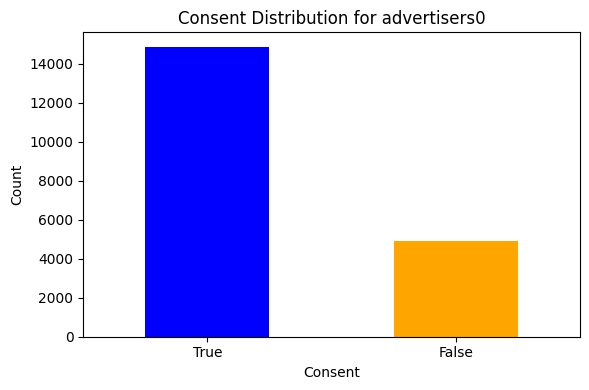

In [23]:
#Relation between the advertiser and the consent

top_advertisers = data['advertisers'].value_counts().head(10)
print("Top 10 advertisers:")
print(top_advertisers)

advertiser0_data = data[data['advertisers'] == 'advertisers0']

# Plot
plt.figure(figsize=(6, 4))
advertiser0_data['consent'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Consent Distribution for advertisers0')
plt.xlabel('Consent')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [28]:
bidder_duration_sum = data.groupby('bidder')['auction_ttl'].sum()
total_duration = bidder_duration_sum.sum()
percentages = (bidder_duration_sum / total_duration) * 100
sorted_percentages = percentages.sort_values(ascending=False)
print("Percentage of duration per bidder:")
for bidder, percentage in sorted_percentages.items():
    print(f"{bidder}: {percentage:.2f}%")

Percentage of duration per bidder:
bidder9: 28.13%
bidder1: 16.03%
bidder3: 15.19%
bidder0: 9.38%
bidder4: 5.19%
bidder10: 5.18%
bidder7: 4.02%
bidder8: 3.62%
bidder6: 3.52%
bidder5: 3.49%
bidder2: 2.20%
bidder12: 2.17%
bidder11: 1.64%
bidder13: 0.10%
bidder14: 0.05%
bidder15: 0.04%
bidder16: 0.03%


In [25]:
#data.head()
data.nunique()


device                         3
domain                       231
country                      116
oeid                       13646
auction_start              14743
auction_end                14685
auction_ttl                 4569
auction_id                 16633
ad_unit_code                1285
bidder                        17
bidder_cpm                  1397
bidder_start               15953
bidder_end                 13652
bidder_ttl                  3166
bidder_is_after_timeout        2
bidder_media_type              4
bidder_width                  11
bidder_height                 13
bidder_status                  3
bidder_deal_id                10
consent                        2
advertisers                  126
is_impression                  2
refreshed                      2
os                             7
dtype: int64